In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Euler Method
## 1 Runge-Kutta Methods: $ \frac{dy}{dx} = f(x,y)$ with initial conditional $ y(x_0) = y_0$
### 1.1 First-order RKM
$$y_1 = y_0 + \Delta x f(x_0,y_0)$$
$$y_2 = y_1 + \Delta x f(x_1,y_1)$$
$$...$$
$$y_{n+1} = y_n + \Delta f(x_n,y_n)$$
### 1.2 Second-order RKM
$$k_1 = \Delta x f(x_n,y_n),\quad k_2 = \Delta x f(x_n+\alpha \Delta x,y_n + \beta k_1),\quad y_{n+1} = y_n + a k_1 + b k_2$$
With constraints $$a+b = 1,\quad \alpha b = \beta b = 1/2$$
#### Note: (i) Modified Euler (a = b); (ii) Midpoint Method (a = 0)

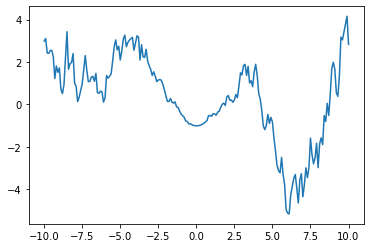

In [123]:
class rkm:
    def __init__(self,f,Step,Initial_Condition,x_range):
        self.f = f
        self.dx = Step
        self.decimal = int(np.log(1/Step)/np.log(10))
        self.x0, self.y0 = Initial_Condition
        self.x_start,self.x_end = x_range
        self.y_dict = dict()
    def compute(self,x,y,dx,alpha,beta,a,b):
        self.x_list.append(x)
        self.y_list.append(y)
        self.y_dict[x]=y
        k1 = dx*self.f(x,y)
        k2 = dx*self.f(x+ alpha*dx,y+beta+k1)
        y = y + a*k1 + b*k2
        x = round(x + dx,self.decimal)
        
        return (x,y)
    def srkm(self,a): # Second order RK method
        x = self.x0
        y = self.y0
        self.x_list = []
        self.y_list = []
        b = 1 - a
        if b!=0:
            alpha = 0.5/b
            beta = alpha
        else:
            alpha = input('Please enter alpha.')
            beta = input('Please enter beta.')
        while x>=self.x_start:            
            x,y = self.compute(x,y,-self.dx,alpha,beta,a,b) 
        self.x_list.reverse()
        self.y_list.reverse()
        x,y = self.x0,self.y0
        while x<=self.x_end:        
            x,y = self.compute(x,y,self.dx,alpha,beta,a,b)            
        plt.plot(self.x_list,self.y_list)
        return self.y_dict
    def Modified_Euler(self):
        return self.srkm(0.5)
    def Mindpoint_Method(self):
        return self.srkm(0)
def f(x,y):
    return np.sin(x) + x*np.random.normal() #*np.random.poisson()
for i in range(1):
    Result = rkm(f,0.1,(0,-1),(-10,10)).Mindpoint_Method()

In [117]:
Result

{0: 0,
 -0.1: 0.004997916927067834,
 -0.2: 0.019941730174427758,
 -0.3: 0.04468212609988005,
 -0.4: 0.07897190684542518,
 -0.5: 0.1224684602565482,
 -0.6: 0.17473718314961412,
 -0.7: 0.23525582372321807,
 -0.8: 0.3034196997255515,
 -0.9: 0.37854774023958077,
 -1.0: 0.45988929071851814,
 -1.1: 0.5466316132779199,
 -1.2: 0.637908007303972,
 -1.3: 0.7328064692395306,
 -1.4: 0.8303788050221965,
 -1.5: 0.9296501041259554,
 -1.6: 1.0296284805448912,
 -1.7: 1.1293149833902831,
 -1.8: 1.227713578077677,
 -1.9: 1.323841098375207,
 -2.0: 1.416737069875594,
 -2.1: 1.5054733067389314,
 -2.2: 1.5891631858187811,
 -2.3: 1.6669705055075732,
 -2.4: 1.7381178407866578,
 -2.5: 1.8018943110001082,
 -2.6: 1.85766268273925,
 -2.7: 1.9048657368682382,
 -2.8: 1.9430318360734713,
 -2.9: 1.9717796373077259,
 -3.0: 1.9908219020438287,
 -3.1: 1.9999683662670724,
 -3.2: 1.9991276415303576,
 -3.3: 1.9883081280773467,
 -3.4: 1.9676179309100068,
 -3.5: 1.9372637796391639,
 -3.6: 1.897548962910568,
 -3.7: 1.848870298